# Introduction

In this lab, we will use the Scikit-learn Elastic-Net regression model to illustrate how the performance of an estimator on unseen data (test data) is not the same as the performance on training data. We will generate sample data, compute train and test errors, and plot the results functions.



# Generate Sample Data

We will generate sample data using the **make_regression()** function from Scikit-learn. We will set the number of training samples to 75, the number of test samples to 150, and the number of features to 500. We will also set **n_informative** to 50 and **shuffle** to False.

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

n_samples_train, n_samples_test, n_features = 75, 150, 500
X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=50,
    shuffle=False,
    noise=1.0,
    coef=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_samples_train, test_size=n_samples_test, shuffle=False
)

# Compute Train and Test Errors

We will compute train and test errors using the Elastic-Net regression model from Scikit-learn. We will set the regularization parameter **alpha** to a range of values from 10^-5 to 10^1 using **np.logspace()**. We will also set the **l1_ratio** to 0.7 and **max_iter** to 10000.

In [2]:
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.00016608827826277166


# Plot Results Functions

We will plot the results functions using the **matplotlib** library. We will use the **plt.subplot()** function to create two subplots. In the first subplot, we will plot the train and test errors as a function of the regularization parameter. We will also plot a vertical line at the optimal regularization parameter. In the second subplot, we will plot the true coefficients and the estimated coefficients.

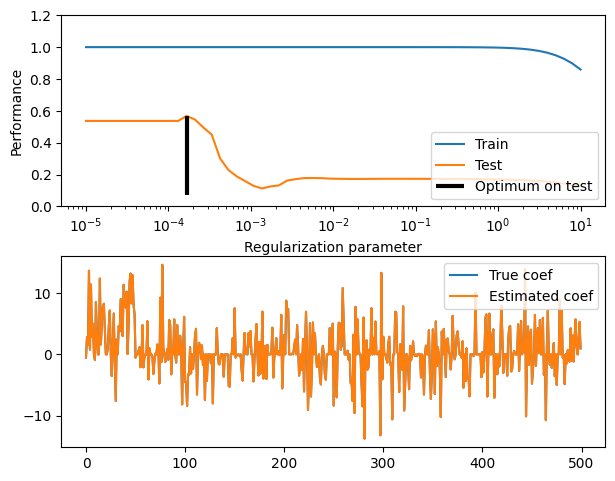

In [5]:
import matplotlib.pyplot as plt

coef_ = enet.coef_
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower right")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

# Summary

In this lab, we learned how to use the Scikit-learn Elastic-Net regression model to compute train and test errors and plot the results functions. We also learned how the performance of an estimator on unseen data (test data) is not the same as the performance on training data. We generated sample data, computed train and test errors, and plotted the results functions using the **make_regression()**, **linear_model.ElasticNet()**, **train_test_split()**, **np.logspace()**, and **matplotlib** functions.